# Pandas Fundamentals
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. It is one of the most widely used libraries in Python for data science. In this notebook, some code for basics data manipulation using pandas are provided.

# Import numpy and pandas libraries

In [1]:
import numpy as np
import pandas as pd

# Series:
A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type.

In [2]:
# Creating a pandas series
# list,numpy array, or dictionary can be converted to a Series

In [3]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])
d = {'a':10,'b':20,'c':30}

In [4]:
pd.Series(data = my_list)

0    10
1    20
2    30
dtype: int64

In [5]:
type(pd.Series(data = my_list))

pandas.core.series.Series

In [6]:
pd.Series(data = my_list,index = labels)

a    10
b    20
c    30
dtype: int64

In [7]:
pd.Series(data = arr, index = labels)

a    10
b    20
c    30
dtype: int32

In [8]:
type(pd.Series(data = arr, index = labels))

pandas.core.series.Series

In [9]:
pd.Series(np.random.randn(4,3).ravel())

0    -0.496672
1     0.460202
2     0.631888
3     0.893966
4    -0.246246
5    -0.180697
6     1.543928
7     0.793030
8     1.098521
9    -2.279995
10    0.627571
11   -0.153805
dtype: float64

# DataFrames
DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. DataFrame of pandas is extremely useful for data handling and manipulation for producing a dataset which is ready for subsequent machine learning stage.

In [10]:
# Create a dataframe
content = np.arange(1,26).reshape(5,5)
df = pd.DataFrame(data = content, index = ['A','B','C','D','E'], columns=['V','W','X','Y','Z'])
df

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10
C,11,12,13,14,15
D,16,17,18,19,20
E,21,22,23,24,25


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.size

25

In [13]:
df.shape

(5, 5)

In [14]:
df.columns

Index(['V', 'W', 'X', 'Y', 'Z'], dtype='object')

In [15]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [16]:
df.dtypes

V    int32
W    int32
X    int32
Y    int32
Z    int32
dtype: object

In [17]:
# Information for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V       5 non-null      int32
 1   W       5 non-null      int32
 2   X       5 non-null      int32
 3   Y       5 non-null      int32
 4   Z       5 non-null      int32
dtypes: int32(5)
memory usage: 140.0+ bytes


In [18]:
# Descriptive statistic of the dataframe
df.describe() 

,V,W,X,Y,Z
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,11.000000,12.000000,13.000000,14.000000,15.000000
std,7.905694,7.905694,7.905694,7.905694,7.905694
min,1.000000,2.000000,3.000000,4.000000,5.000000
25%,6.000000,7.000000,8.000000,9.000000,10.000000
50%,11.000000,12.000000,13.000000,14.000000,15.000000
75%,16.000000,17.000000,18.000000,19.000000,20.000000
max,21.000000,22.000000,23.000000,24.000000,25.000000


In [19]:
# Transpose the descriptive statistic of the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V,5.0,11.0,7.905694,1.0,6.0,11.0,16.0,21.0
W,5.0,12.0,7.905694,2.0,7.0,12.0,17.0,22.0
X,5.0,13.0,7.905694,3.0,8.0,13.0,18.0,23.0
Y,5.0,14.0,7.905694,4.0,9.0,14.0,19.0,24.0
Z,5.0,15.0,7.905694,5.0,10.0,15.0,20.0,25.0


# Selection and Indexing

In [20]:
df

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10
C,11,12,13,14,15
D,16,17,18,19,20
E,21,22,23,24,25


In [21]:
# Select W column
df['W']

A     2
B     7
C    12
D    17
E    22
Name: W, dtype: int32

In [22]:
# Note: If we want to get it as dataframe we need to use double square brackets
df[['W']]

,W
A,2
B,7
C,12
D,17
E,22


In [23]:
# Select V and Y column
df[['V','Y']]

,V,Y
A,1,4
B,6,9
C,11,14
D,16,19
E,21,24


In [24]:
# Select the first 2 rows
df.head(2)

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10


In [25]:
# Select the last 2 rows
df.tail(2)

,V,W,X,Y,Z
D,16,17,18,19,20
E,21,22,23,24,25


In [26]:
# Create a new column 'Sum', which is the sum of each row
df['Sum'] = np.int32(np.sum(df,axis = 1))
df

,V,W,X,Y,Z,Sum
A,1,2,3,4,5,15
B,6,7,8,9,10,40
C,11,12,13,14,15,65
D,16,17,18,19,20,90
E,21,22,23,24,25,115


In [27]:
# Create a new column 'V_Times_W', which is the product of columns V and W. This is useful when creating new columns
# for feature engineering during machine learning model building
df['V_Times_W'] = df['V'] * df['W']
df

,V,W,X,Y,Z,Sum,V_Times_W
A,1,2,3,4,5,15,2
B,6,7,8,9,10,40,42
C,11,12,13,14,15,65,132
D,16,17,18,19,20,90,272
E,21,22,23,24,25,115,462


In [28]:
# Remove the new columns 'Sum' and 'V_Times_W' using drop()
# inplace must be set to True in order to remove it permanently
df.drop(columns=['Sum','V_Times_W'], axis = 1, inplace=True)
df

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10
C,11,12,13,14,15
D,16,17,18,19,20
E,21,22,23,24,25


In [29]:
# Remove row E
df.drop(index = 'E', axis = 0, inplace=True)
df

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10
C,11,12,13,14,15
D,16,17,18,19,20


# Using loc[] for selection using labels

In [30]:
# Select row A and C
df.loc[['A','C'],:]

,V,W,X,Y,Z
A,1,2,3,4,5
C,11,12,13,14,15


In [31]:
# Select row B and D, and column X and Z
df.loc[['B','D'],['X','Z']]

,X,Z
B,8,10
D,18,20


# Using iloc[] for selection using index position

In [32]:
# Select row A and C
df.iloc[[0,2],:]

,V,W,X,Y,Z
A,1,2,3,4,5
C,11,12,13,14,15


In [33]:
# Select row B and D, and column X and Z
df.iloc[[1,3],[2,4]]

,X,Z
B,8,10
D,18,20


# Conditional Selection
An important feature of pandas is conditional selection using bracket notation, very similar to numpy

In [34]:
df

,V,W,X,Y,Z
A,1,2,3,4,5
B,6,7,8,9,10
C,11,12,13,14,15
D,16,17,18,19,20


In [35]:
df > 10

,V,W,X,Y,Z
A,False,False,False,False,False
B,False,False,False,False,False
C,True,True,True,True,True
D,True,True,True,True,True


In [36]:
df[df > 10]

,V,W,X,Y,Z
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN
C,11.0,12.0,13.0,14.0,15.0
D,16.0,17.0,18.0,19.0,20.0


In [37]:
# Select rows with value of column V >= 10
df[df['V'] >= 10]

,V,W,X,Y,Z
C,11,12,13,14,15
D,16,17,18,19,20


In [38]:
# Select rows with value of column W > 7 and column X > 13
# For two conditions we can use | and & with parenthesis
# Notice the pairs of parenthesis for each condition
df[(df['W'] > 7) & (df['X'] > 13)]

,V,W,X,Y,Z
D,16,17,18,19,20


# More Index Details

In [39]:
# Reset to default 0,1...n index
df.reset_index(inplace = True)
df

,index,V,W,X,Y,Z
0,A,1,2,3,4,5
1,B,6,7,8,9,10
2,C,11,12,13,14,15
3,D,16,17,18,19,20


In [40]:
# Create a new column 'States' and set it as the index
df['States'] = ['CA','NY','WY','OR']
df

,index,V,W,X,Y,Z,States
0,A,1,2,3,4,5,CA
1,B,6,7,8,9,10,NY
2,C,11,12,13,14,15,WY
3,D,16,17,18,19,20,OR


In [41]:
df.set_index('States', inplace = True)
df

,index,V,W,X,Y,Z
States,,,,,,
CA,A,1,2,3,4,5
NY,B,6,7,8,9,10
WY,C,11,12,13,14,15
OR,D,16,17,18,19,20


# Handling missing data
Note: Handling missing data is a huge topic in data manipulation and data cleansing. It is tricky, time consuming and may require domain knowledge in order to fill those missing data appropriately. Here only some simple examples are shown.

In [42]:
df = pd.DataFrame({'A':[1,2,np.nan],
                    'B':[5,np.nan,np.nan],
                    'C':[1,2,3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [43]:
# Drop all rows with NA
df.dropna()

,A,B,C
0,1.0,5.0,1


In [44]:
# Drop all columns with NA
df.dropna(axis = 1)

,C
0,1
1,2
2,3


In [45]:
# Fill NA with some fixed value

In [46]:
df.fillna(value = 999)

,A,B,C
0,1.0,5.0,1
1,2.0,999.0,2
2,999.0,999.0,3


In [47]:
# Fill NA value in column A using its mean value (non-NaN)
df['A'].fillna(value = df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

# Groupby
The groupby method allows you to group rows of data together and call aggregate functions

In [48]:
# Create a dictionary for dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
         'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
         'Sales':[200,120,340,124,243,350]}

In [49]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [50]:
# Find the mean sales of each company
df.groupby('Company')['Sales'].mean()

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

In [51]:
# Find the max sales person of each company
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


# Merging, Joining, and Concatenating
There are 3 main ways of combining DataFrames together: Merging, Joining and Concatenating

In [52]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                     index=[0, 1, 2, 3])


In [53]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                     index=[4, 5, 6, 7]) 


In [54]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                     index=[8, 9, 10, 11])


In [55]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [56]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [57]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


# Concatenation:
Concatenation basically glues together DataFrames. Keep in mind that dimensions should match along the axis you are concatenating on. You can use pd.concat and pass in a list of DataFrames to concatenate together.

In [58]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [59]:
# If concatenate column-wise, NaN values will be shown
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


# Merging:
The merge function allows you to merge DataFrames together using a similar logic as merging SQL Tables together. This is very useful when we have data coming from different sources, and they shall be merged together for subsequent data manipulation and machine learning model building.

In [60]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
 
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'C': ['C0', 'C1', 'C2', 'C3'],
                         'D': ['D0', 'D1', 'D2', 'D3']}) 

In [61]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [62]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [63]:
# Do an inner join for left and right using primary key column 'key'
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


# Joining:
Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame.

In [64]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                     'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [65]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [66]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [67]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [68]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


# Operations:
There are lots of operations with pandas that will be really useful to you, but don't fall into any distinct category.

In [69]:
import pandas as pd
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


# Info on Unique Values

In [70]:
# Get all unique values from col2
df['col2'].unique()

array([444, 555, 666], dtype=int64)

In [71]:
# Get number of unique values from col2
df['col2'].nunique()

3

In [72]:
# Get the count of each unique value for col2
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

# Applying Functions

In [73]:
def times2(x):
    return x*2

In [74]:
df['col1'].apply(times2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [75]:
# Same result can be achieved without defining function by using lambda expression
df['col1'].apply(lambda x: x * 2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [76]:
# Getting column names of df
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [77]:
# Getting index of df
df.index

RangeIndex(start=0, stop=4, step=1)

# Sorting and Ordering a DataFrame

In [78]:
df

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [79]:
# Sort df based on values of col2 in ascending order
# To set inplace = True if required
df.sort_values(by = 'col2',ascending=True, inplace = True)
df

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


# Find Null Values or Check for Null Values

In [80]:
df.isnull()

,col1,col2,col3
0,False,False,False
3,False,False,False
1,False,False,False
2,False,False,False


# Filling in NaN values with something else

In [81]:
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                     'col2':[np.nan,555,666,444],
                     'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [82]:
# Fill NaN with other specified value
df.fillna(9999)

,col1,col2,col3
0,1.0,9999.0,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,9999.0,444.0,xyz


# Pivot table:
Pivot table in pandas is an excellent tool to summarize one or more numeric variable based on two other categorical variables.

In [83]:
data = {'A':['foo','foo','foo','bar','bar','bar'],
         'B':['one','one','two','two','one','one'],
         'C':['x','y','x','y','x','y'],
         'D':[1,3,2,5,4,1]}
df = pd.DataFrame(data)
df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [84]:
df.pivot_table(values='D',index=['A', 'B'],columns=['C'])

C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

# Additional codes for data manipulation using pandas dataframe

In [85]:
# Build a new dataframe 'employee'
dict1 = {"names" : ["kasim", "nabil", "jack", "soon"],
        "age" : [100, 200, 300, 500],
        "Qualification" : ["BE", "BE", "PHD", "Masters"]}

employee = pd.DataFrame(dict1, index = ["Emp1", "Emp2", "Emp3", "Emp4"])
employee

,names,age,Qualification
Emp1,kasim,100,BE
Emp2,nabil,200,BE
Emp3,jack,300,PHD
Emp4,soon,500,Masters


In [86]:
# Rename columns and index using .rename
employee.rename(columns = {"names" : "Names", 
                           "age" : "Age"}, 
                index = {"Emp1": "Employee1", 
                         "Emp2": "Employee2", 
                         "Emp3" : "Employee3",
                         "Emp4": "Employee4"},
               inplace = True)
employee

,Names,Age,Qualification
Employee1,kasim,100,BE
Employee2,nabil,200,BE
Employee3,jack,300,PHD
Employee4,soon,500,Masters


In [87]:
# Rename the columns
employee.columns = ["x1", "x2", "x3"]
employee

,x1,x2,x3
Employee1,kasim,100,BE
Employee2,nabil,200,BE
Employee3,jack,300,PHD
Employee4,soon,500,Masters


In [88]:
# Rename the index
employee.index = ["I1", "I2", "I3","I4"]
employee

,x1,x2,x3
I1,kasim,100,BE
I2,nabil,200,BE
I3,jack,300,PHD
I4,soon,500,Masters


# Filtering based on conditions

In [89]:
employee

,x1,x2,x3
I1,kasim,100,BE
I2,nabil,200,BE
I3,jack,300,PHD
I4,soon,500,Masters


In [90]:
# Show the row for which x1 column is 'kasim'
employee.loc[employee["x1"] == "kasim"]

,x1,x2,x3
I1,kasim,100,BE


In [91]:
# Show those rows for which x2 column is less than 400
employee.loc[employee["x2"] < 400]

,x1,x2,x3
I1,kasim,100,BE
I2,nabil,200,BE
I3,jack,300,PHD


In [92]:
# Show those rows for which x2 column is less than 400 and x3 column is 'BE'
employee.loc[(employee["x2"] < 400) & (employee["x3"] == "BE")]

,x1,x2,x3
I1,kasim,100,BE
I2,nabil,200,BE


In [93]:
# Show the x1 column for those rows for which x2 column is less than 400 and x3 column is 'BE'
employee.loc[(employee["x2"] < 400) & (employee["x3"] == "BE")][["x1"]]

,x1
I1,kasim
I2,nabil


In [94]:
employee.drop(columns = ["x2"], inplace = True)
employee

,x1,x3
I1,kasim,BE
I2,nabil,BE
I3,jack,PHD
I4,soon,Masters


In [95]:
employee.drop(labels=["x1"],axis=1)

,x3
I1,BE
I2,BE
I3,PHD
I4,Masters


In [96]:
employee.drop(index=["I1"],axis=0)

,x1,x3
I2,nabil,BE
I3,jack,PHD
I4,soon,Masters


In [97]:
dict1 = {"names" : ["kasim", "nabil", "jack", "soon"],
        "age" : [100, 200, 300, 500],
        "Qualification" : ["BE", "BE", "PHD", "Masters"]}

employee = pd.DataFrame(dict1, index = ["Emp1", "Emp2", "Emp3", "Emp4"])



employee.rename(columns = {"names" : "Names", 
                           "age" : "Age"}, 
                index = {"Emp1": "Employee1", 
                         "Emp2": "Employee2", 
                         "Emp3" : "Employee3",
                         "Emp4": "Employee4"},
               inplace = True)
employee

,Names,Age,Qualification
Employee1,kasim,100,BE
Employee2,nabil,200,BE
Employee3,jack,300,PHD
Employee4,soon,500,Masters


In [98]:
# Count the number of each unique item of column 'Qualification'
employee["Qualification"].value_counts()

BE         2
PHD        1
Masters    1
Name: Qualification, dtype: int64

# Some data visualizations using pandas-built in visualization

<AxesSubplot:>

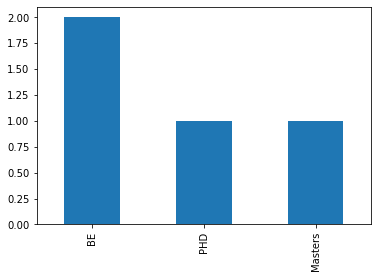

In [99]:
employee["Qualification"].value_counts().plot.bar()

In [100]:
employee["Qualification"]

Employee1         BE
Employee2         BE
Employee3        PHD
Employee4    Masters
Name: Qualification, dtype: object

<AxesSubplot:>

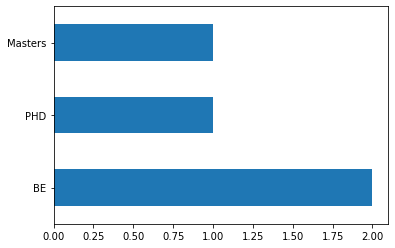

In [101]:
employee["Qualification"].value_counts().plot.barh()

<AxesSubplot:ylabel='Qualification'>

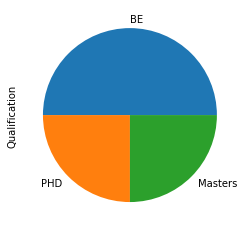

In [102]:
employee["Qualification"].value_counts().plot.pie()

<AxesSubplot:ylabel='Frequency'>

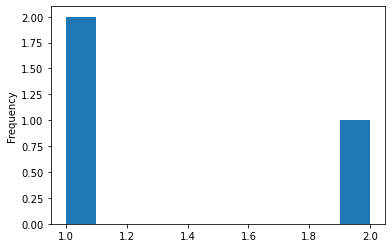

In [103]:
employee["Qualification"].value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

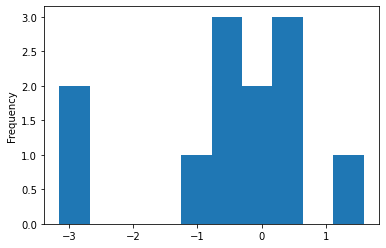

In [104]:
pd.Series(np.random.randn(4,3).ravel()).plot.hist(bins = 10)